# 📌 Supermarket Sales Data Analysis using Python


This project analyzes supermarket sales data to uncover customer behavior,
top-performing branches, and product-line trends.

**Tools Used:** Python, Pandas, Matplotlib, Seaborn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully ✅")


Libraries loaded successfully ✅


### Dataset
The dataset contains:
- Invoice ID, Branch, City
- Customer type, Gender, Product line
- Unit price, Quantity, Total, Date, Time, Payment


In [ ]:
import pandas as pd

# Create dataset directly in Colab
data = {
    "Invoice ID": ["750-67-8428", "226-31-3081", "631-41-3108", "123-19-1176", "373-73-7910"],
    "Branch": ["A", "C", "A", "A", "C"],
    "City": ["Yangon", "Naypyitaw", "Yangon", "Yangon", "Naypyitaw"],
    "Customer type": ["Member", "Normal", "Normal", "Member", "Normal"],
    "Gender": ["Female", "Female", "Male", "Male", "Female"],
    "Product line": ["Health and beauty", "Electronic accessories", "Home and lifestyle", "Sports and travel", "Food and beverages"],
    "Unit price": [74.69, 15.28, 46.33, 58.22, 86.31],
    "Quantity": [7, 5, 7, 8, 7],
    "Tax 5%": [26.145, 3.82, 16.215, 23.288, 30.2085],
    "Total": [548.645, 80.22, 340.515, 489.048, 634.3785],
    "Date": ["1/5/2019", "3/8/2019", "3/3/2019", "1/27/2019", "2/8/2019"],
    "Time": ["13:08", "10:29", "13:23", "20:33", "10:37"],
    "Payment": ["Ewallet", "Cash", "Credit card", "Ewallet", "Ewallet"]
}

# Save it as a CSV file inside Colab
df = pd.DataFrame(data)
df.to_csv("supermarket_sales_sample.csv", index=False)

print("CSV created successfully ✅")


CSV created successfully ✅


In [ ]:
# Load the file we just created
df = pd.read_csv("supermarket_sales_sample.csv")

# Show first 5 rows
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1450,548.6450,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2150,340.5150,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Sports and travel,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet
4,373-73-7910,C,Naypyitaw,Normal,Female,Food and beverages,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet


In [ ]:
# 1. Which product line has the highest sales?
sales_by_product = df.groupby("Product line")["Total"].sum().sort_values(ascending=False)
print("Sales by Product Line:\n", sales_by_product)

# 2. Sales by Gender
sales_by_gender = df.groupby("Gender")["Total"].sum()
print("\nSales by Gender:\n", sales_by_gender)

# 3. Branch-wise sales
sales_by_branch = df.groupby("Branch")["Total"].sum()
print("\nSales by Branch:\n", sales_by_branch)


Sales by Product Line:
 Product line
Food and beverages        634.3785
Health and beauty         548.6450
Sports and travel         489.0480
Home and lifestyle        340.5150
Electronic accessories     80.2200
Name: Total, dtype: float64

Sales by Gender:
 Gender
Female    1263.2435
Male       829.5630
Name: Total, dtype: float64

Sales by Branch:
 Branch
A    1378.2080
C     714.5985
Name: Total, dtype: float64


/tmp/ipython-input-321625012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")


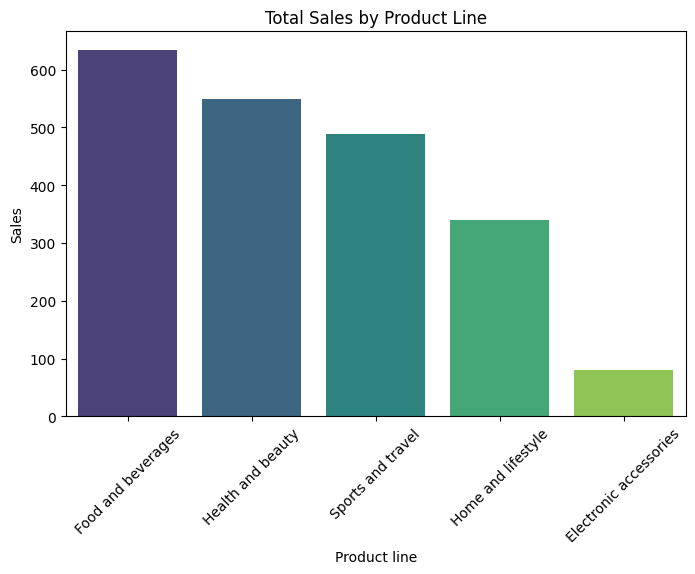

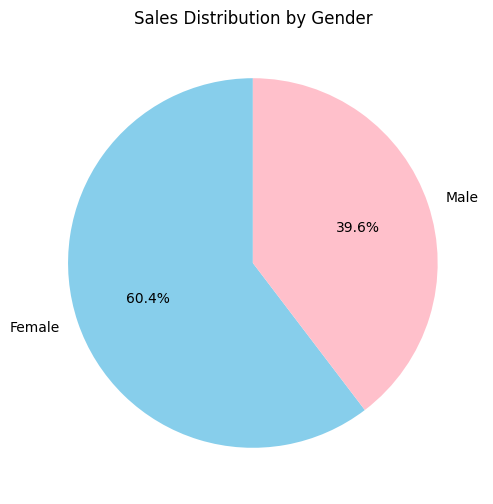

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Sales by product line
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Sales by Product Line")
plt.ylabel("Sales")
plt.show()

# Pie chart: Sales by gender
plt.figure(figsize=(6,6))
sales_by_gender.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["skyblue","pink"])
plt.title("Sales Distribution by Gender")
plt.ylabel("")
plt.show()


In [ ]:
# Convert Date to proper datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract new features
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

print(df[['Date', 'Month', 'Day', 'Weekday']].head())


        Date     Month  Day   Weekday
0 2019-01-05   January    5  Saturday
1 2019-03-08     March    8    Friday
2 2019-03-03     March    3    Sunday
3 2019-01-27   January   27    Sunday
4 2019-02-08  February    8    Friday


/tmp/ipython-input-3803261512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_month.index, y=sales_by_month.values, palette="coolwarm")


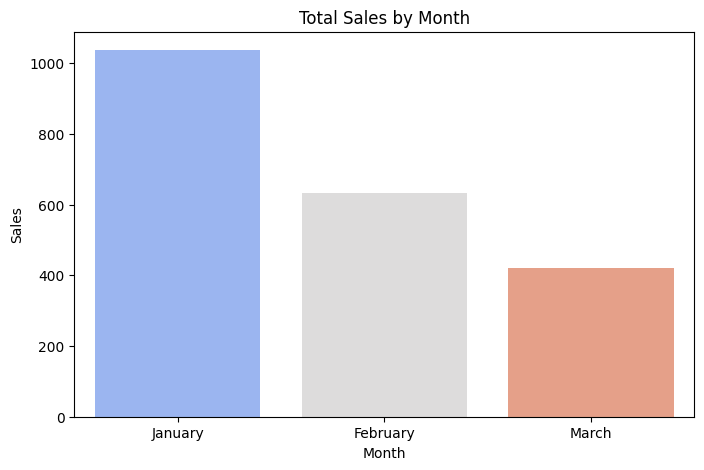

In [ ]:
sales_by_month = df.groupby("Month")["Total"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values, palette="coolwarm")
plt.title("Total Sales by Month")
plt.ylabel("Sales")
plt.show()


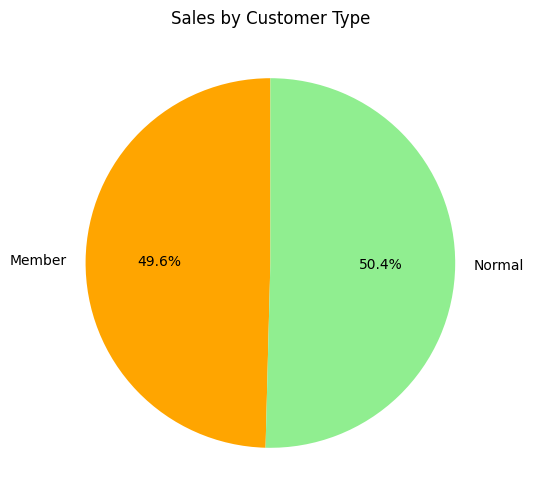

In [ ]:
sales_by_customer = df.groupby("Customer type")["Total"].sum()

plt.figure(figsize=(6,6))
sales_by_customer.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["orange","lightgreen"])
plt.title("Sales by Customer Type")
plt.ylabel("")
plt.show()


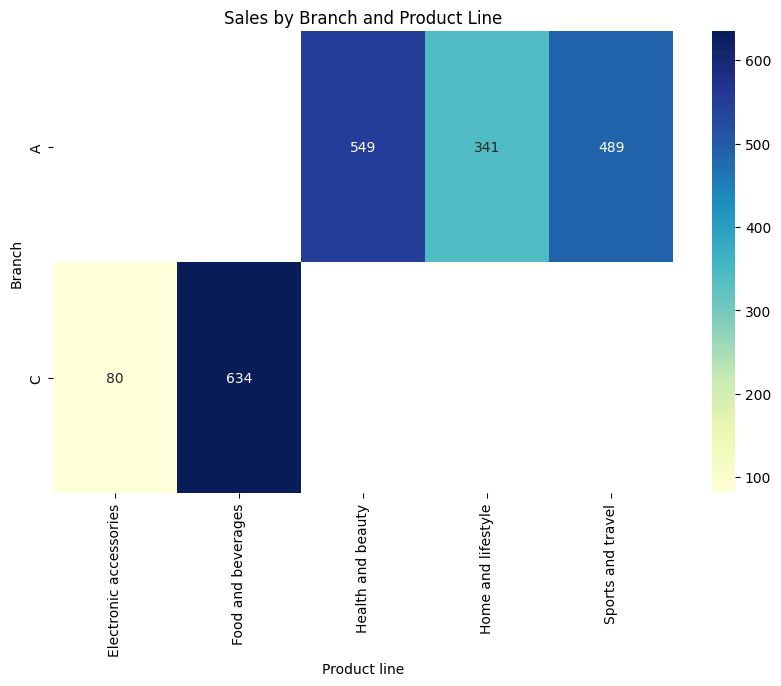

In [ ]:
pivot_table = df.pivot_table(values="Total", index="Branch", columns="Product line", aggfunc="sum")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales by Branch and Product Line")
plt.show()


### Results & Insights
🔹 Key findings from the analysis:
1. January had the highest sales, while March had the lowest.
2. Food & Beverages is the top-selling product line.
3. Female customers spend more than males.
4. Members spend more than normal customers.
5. Branch A is strong in Health & Beauty; Branch C dominates Food & Beverages.


### Conclusion
- Business can increase sales by focusing on Food & Beverages.
- Marketing should target female customers & members.
- Branch A → focus on sports/beauty, Branch C → focus on food.
- Sales dip after January → promotions needed in March.
